# Soc-88 Final Project

This notebook is the first step for your final project.  In this notebook, you will be introduced to your dataset and guided through some analysis and visualizations that you will use for your final policy brief.  You can use some or all of the figures provided below to formulate your argument.

If you want, you can perform your own analysis and create your own figures.

# The Data

In [1]:
from datascience import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

This dataset is a merged version of several different datasets.

The first contains K-12 education data for all states over the years 1992-2017. In a broad sense, it includes financial data about the schools, enrollment data per grade group, academic achievement per state, and a breakdown of race and gender. A detailed description of the features can be found here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project/download#states_all.csv The licensing permits us to use it as long as we do not identify specific students or schools.

The second dataset provides poverty rate (and other related variables) by state and year, from the US Census Bureau's current population survey, which can be found here: https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-poverty-people.html.  This is publicly available data.

The third dataset has the percent of those aged 25-44 with a bachelors degree or higher by state and year, from the Current Population Survey, Annual Social and Economic Supplement: https://www.census.gov/cps/data/cpstablecreator.html.  This is also publicly available data.

In [2]:
edu = Table.read_table('overall_data_post02.csv')
edu

STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,FED_PER_STUDENT,STATE_PER_STUDENT,TOTAL_PER_STUDENT,PCT_IN_POVERTY,PCT_WITH_BA
AL,2003,727900,5.19605e+06,567704,2.96698e+06,223.345,261.939,207.084,261.871,779.92,4076.08,7138.42,15,23.9066
AK,2003,133303,1.42595e+06,259423,813371,232.992,279.025,211.547,268.772,1946.12,6101.67,10697,9.6,21.6089
AZ,2003,875111,6.52989e+06,740579,2.91263e+06,228.911,271.177,208.873,267.809,846.269,3328.3,7461.79,13.5,26.8599
AR,2003,450158,3.24128e+06,379947,2.39434e+06,229.007,265.772,213.615,264.657,844.03,5318.88,7200.31,17.8,18.9715
CA,2003,6.22655e+06,5.98159e+07,5.79566e+06,3.36178e+07,227.455,267.05,205.632,255.073,930.797,5399.1,9606.58,13.1,29.6895
CO,2003,751049,6.29724e+06,400219,2.71522e+06,235.193,283.4,223.661,266.229,532.88,3615.24,8384.6,9.7,36.3115
CT,2003,548466,6.95989e+06,351001,2.4819e+06,240.615,283.73,228.341,268.124,639.969,4525.17,12689.7,8.1,35.6758
DE,2003,111282,1.24244e+06,91986,794472,235.859,277.158,223.929,253.173,826.603,7139.27,11164.8,7.3,30.1491
FL,2003,2.5367e+06,1.95498e+07,1.9568e+06,8.68914e+06,233.729,271.371,218.014,255.32,771.397,3425.37,7706.8,12.7,28.9264
GA,2003,1.49582e+06,1.35248e+07,1.05197e+06,6.5517e+06,230.255,269.677,213.597,257.998,703.276,4380.01,9041.74,11.9,26.8756


We have cleaned the data and produced several relevant subsets which we will be using below for our analysis.  


__Note that that the only years listed in this dataset are 1996, 2000, 2003, 2005, 2007, 2009, 2011, 2013, and 2015.__  These are the only years in which we had complete data for all three datasets.

# The Analysis

Let's first take a look at California and see how the test scores have evolved over the years.

In [3]:
cali_edu = Table.read_table('california_data.csv')
cali_edu

STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,FED_PER_STUDENT,STATE_PER_STUDENT,TOTAL_PER_STUDENT,PCT_IN_POVERTY,PCT_WITH_BA
CA,2003,6.22655e+06,5.98159e+07,5.79566e+06,3.36178e+07,227.455,267.05,205.632,255.073,930.797,5399.1,9606.58,13.1,29.6895
CA,2005,6.30702e+06,6.21718e+07,7.14886e+06,3.49122e+07,230.367,268.558,206.512,264.185,1133.48,5535.44,9857.55,13.2,30.466
CA,2007,6.28869e+06,7.25169e+07,7.2003e+06,4.23336e+07,230.034,270.382,208.522,268.159,1144.96,6731.71,11531.3,12.7,32.8467
CA,2009,6.23416e+06,7.39589e+07,9.74525e+06,4.00842e+07,231.675,270.449,209.762,254.895,1563.2,6429.78,11863.5,15.3,30.8911
CA,2011,6.2026e+06,7.09533e+07,9.99022e+06,3.77527e+07,234.165,272.77,211.359,261.285,1610.65,6086.59,11439.3,16.9,32.0903
CA,2013,6.20873e+06,6.88685e+07,7.83626e+06,3.51412e+07,233.654,275.901,212.546,260.448,1262.14,5659.96,11092.2,14.9,34.8605
CA,2015,6.22652e+06,7.8248e+07,7.55636e+06,4.23605e+07,231.549,275.325,212.678,258.768,1213.58,6803.23,12566.9,13.9,34.7341


Let's plot this. __The plot below has no labels and limited formatting.  It is your job to format the plot and to determine the axis labels and title.__

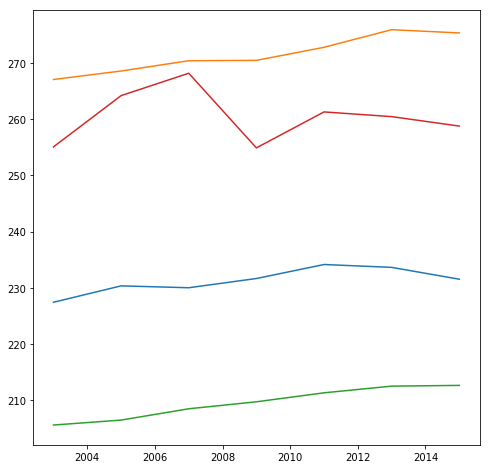

In [4]:
years = cali_edu.column("YEAR")
math4 = cali_edu.column("AVG_MATH_4_SCORE")
math8 = cali_edu.column("AVG_MATH_8_SCORE")
reading4 = cali_edu.column("AVG_READING_4_SCORE")
reading8 = cali_edu.column("AVG_READING_8_SCORE")

fig = plt.figure(facecolor='white', figsize=(8,8))
ax = fig.add_subplot(111)

plt.plot(years, math4)
plt.plot(years, math8)
plt.plot(years, reading4)
plt.plot(years, reading8)

plt.show()

Let's look at something else: how students who were fourth graders in 2003 did in as eighth graders 2007 on math.

In [5]:
data03 = Table.read_table('data_2003.csv')
data07 = Table.read_table('data_2007.csv')

data03

STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,FED_PER_STUDENT,STATE_PER_STUDENT,TOTAL_PER_STUDENT,PCT_IN_POVERTY,PCT_WITH_BA
AL,2003,727900,5.19605e+06,567704,2.96698e+06,223.345,261.939,207.084,261.871,779.92,4076.08,7138.42,15,23.9066
AK,2003,133303,1.42595e+06,259423,813371,232.992,279.025,211.547,268.772,1946.12,6101.67,10697,9.6,21.6089
AZ,2003,875111,6.52989e+06,740579,2.91263e+06,228.911,271.177,208.873,267.809,846.269,3328.3,7461.79,13.5,26.8599
AR,2003,450158,3.24128e+06,379947,2.39434e+06,229.007,265.772,213.615,264.657,844.03,5318.88,7200.31,17.8,18.9715
CA,2003,6.22655e+06,5.98159e+07,5.79566e+06,3.36178e+07,227.455,267.05,205.632,255.073,930.797,5399.1,9606.58,13.1,29.6895
CO,2003,751049,6.29724e+06,400219,2.71522e+06,235.193,283.4,223.661,266.229,532.88,3615.24,8384.6,9.7,36.3115
CT,2003,548466,6.95989e+06,351001,2.4819e+06,240.615,283.73,228.341,268.124,639.969,4525.17,12689.7,8.1,35.6758
DE,2003,111282,1.24244e+06,91986,794472,235.859,277.158,223.929,253.173,826.603,7139.27,11164.8,7.3,30.1491
FL,2003,2.5367e+06,1.95498e+07,1.9568e+06,8.68914e+06,233.729,271.371,218.014,255.32,771.397,3425.37,7706.8,12.7,28.9264
GA,2003,1.49582e+06,1.35248e+07,1.05197e+06,6.5517e+06,230.255,269.677,213.597,257.998,703.276,4380.01,9041.74,11.9,26.8756


__Again, the plot below has no labels and limited formatting.  It is your job to format the plot and to determine the axis labels and title.__

<Figure size 432x288 with 0 Axes>

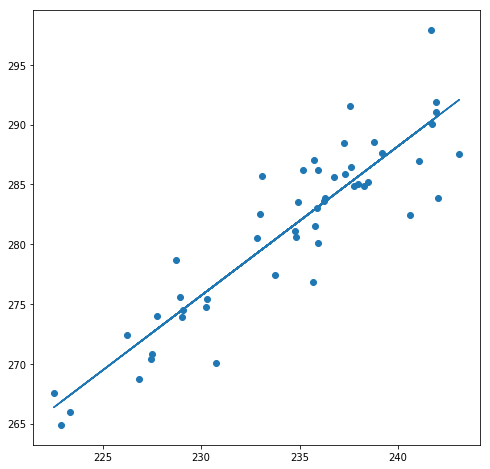

In [6]:
plt.clf()

fig = plt.figure(facecolor='white', figsize=(8,8))
ax = fig.add_subplot(111)

plt.scatter(data03.column("AVG_MATH_4_SCORE"), data07.column("AVG_MATH_8_SCORE"))

#add trendline using np.polyfit: takes x, y, and degree of polynomial (1)
m, b = np.polyfit(data03.column("AVG_MATH_4_SCORE"), data07.column("AVG_MATH_8_SCORE"), 1)
plt.plot(data03.column("AVG_MATH_4_SCORE"), m*data03.column("AVG_MATH_4_SCORE") + b)

plt.show()

Let's now see if there's any correlation between total funding per student and test scores in a given year.

__Again, the plot below has no labels and limited formatting.  It is your job to format the plot and to determine the axis labels and title.__

<Figure size 432x288 with 0 Axes>

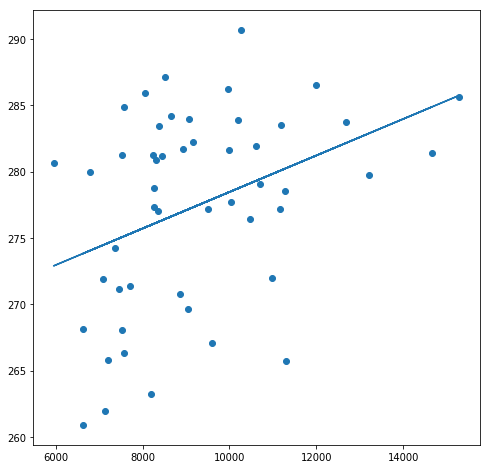

In [7]:
plt.clf()

fig = plt.figure(facecolor='white', figsize=(8,8))
ax = fig.add_subplot(111)

plt.scatter(data03.column("TOTAL_PER_STUDENT"), data03.column("AVG_MATH_8_SCORE"))

#add trendline using np.polyfit: takes x, y, and degree of polynomial (1)
m, b = np.polyfit(data03.column("TOTAL_PER_STUDENT"), data03.column("AVG_MATH_8_SCORE"), 1)
plt.plot(data03.column("TOTAL_PER_STUDENT"), m*data03.column("TOTAL_PER_STUDENT") + b)

plt.show()

We can also look at how percent of households in poverty connect to math test scores in a given year.

__Again, the plot below has no labels and limited formatting.  It is your job to format the plot and to determine the axis labels and title.__

<Figure size 432x288 with 0 Axes>

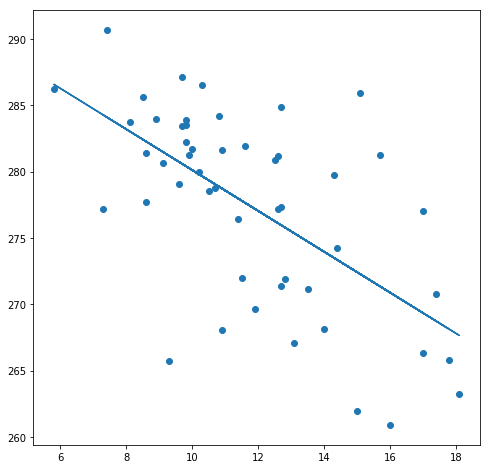

In [8]:
plt.clf()

fig = plt.figure(facecolor='white', figsize=(8,8))
ax = fig.add_subplot(111)

plt.scatter(data03.column("PCT_IN_POVERTY"), data03.column("AVG_MATH_8_SCORE"))

#add trendline using np.polyfit: takes x, y, and degree of polynomial (1)
m, b = np.polyfit(data03.column("PCT_IN_POVERTY"), data03.column("AVG_MATH_8_SCORE"), 1)
plt.plot(data03.column("PCT_IN_POVERTY"), m*data03.column("PCT_IN_POVERTY") + b)

plt.show()

Let's look at correlation data for this, so the correlation between poverty rate and math scores for each year we have data for.

In [9]:
pov_corr = Table.read_table("pov_corr_data.csv")
pov_corr

YEAR,POVERTY_MATH_SCORE_CORR
2003,-0.613976
2005,-0.629487
2007,-0.499033
2009,-0.658931
2011,-0.623586
2013,-0.705125
2015,-0.698869


__Again, the plot below has no labels and limited formatting.  It is your job to format the plot and to determine the axis labels and title.__

<Figure size 432x288 with 0 Axes>

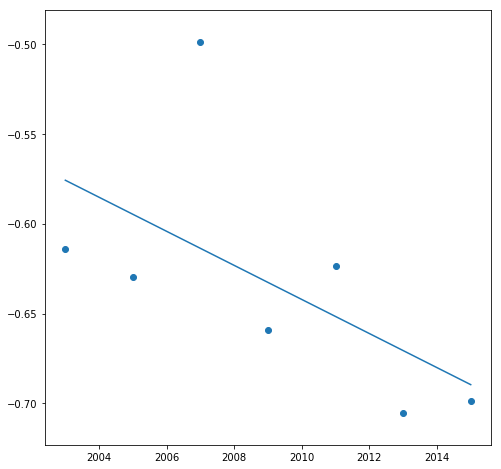

In [10]:
plt.clf()

fig = plt.figure(facecolor='white', figsize=(8,8))
ax = fig.add_subplot(111)

plt.scatter(pov_corr.column("YEAR"), pov_corr.column("POVERTY_MATH_SCORE_CORR"))

#add trendline using np.polyfit: takes x, y, and degree of polynomial (1)
m, b = np.polyfit(pov_corr.column("YEAR"), pov_corr.column("POVERTY_MATH_SCORE_CORR"), 1)
plt.plot(pov_corr.column("YEAR"), m*pov_corr.column("YEAR") + b)

plt.show()

A final thing to look at is how the percent of those aged 25-44 with a bachelors degree or higher connects to math test scores in a given year.

__Again, the plot below has no labels and limited formatting.  It is your job to format the plot and to determine the axis labels and title.__

<Figure size 432x288 with 0 Axes>

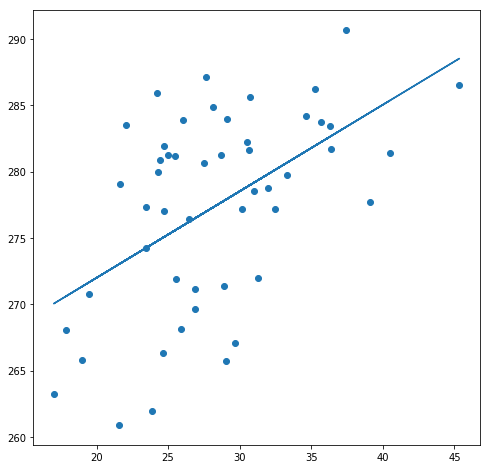

In [11]:
plt.clf()

fig = plt.figure(facecolor='white', figsize=(8,8))
ax = fig.add_subplot(111)

plt.scatter(data03.column("PCT_WITH_BA"), data03.column("AVG_MATH_8_SCORE"))

#add trendline using np.polyfit: takes x, y, and degree of polynomial (1)
m, b = np.polyfit(data03.column("PCT_WITH_BA"), data03.column("AVG_MATH_8_SCORE"), 1)
plt.plot(data03.column("PCT_WITH_BA"), m*data03.column("PCT_WITH_BA") + b)

plt.show()

Let's look at correlation data for this, so the correlation between percent of those aged 25-44 with a bachelors degree or higher and math scores for each year we have data for.

In [12]:
ed_corr = Table.read_table("ed_corr_data.csv")
ed_corr

YEAR,ED_MATH_SCORE_CORR
2003,0.524189
2005,0.544131
2007,0.607817
2009,0.64263
2011,0.603105
2013,0.552329
2015,0.695076


__Again, the plot below has no labels and limited formatting.  It is your job to format the plot and to determine the axis labels and title.__

<Figure size 432x288 with 0 Axes>

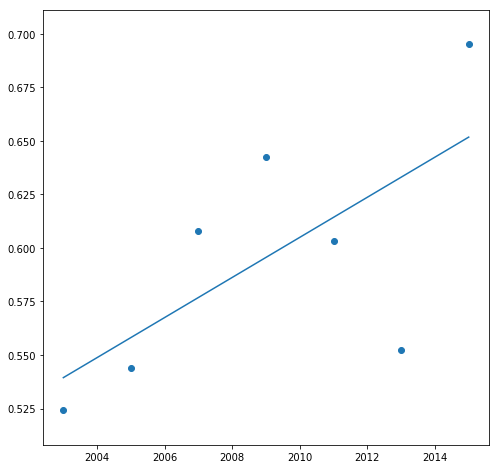

In [13]:
plt.clf()

fig = plt.figure(facecolor='white', figsize=(8,8))
ax = fig.add_subplot(111)

plt.scatter(ed_corr.column("YEAR"), ed_corr.column("ED_MATH_SCORE_CORR"))

#add trendline using np.polyfit: takes x, y, and degree of polynomial (1)
m, b = np.polyfit(ed_corr.column("YEAR"), ed_corr.column("ED_MATH_SCORE_CORR"), 1)
plt.plot(ed_corr.column("YEAR"), m*ed_corr.column("YEAR") + b)

plt.show()

Let's look now at mapping.  The map below is a __template__ for you to use to create your own maps.  __The formatting is up to you.__

In [14]:
import folium
import json
import os
import pandas as pd

In [15]:
state_geo = json.load(open('us-states.json'))

In [16]:
center = [40, -102] # this is the geographic center of the US
m = folium.Map(center, zoom_start=4)

data03 = data03.to_df() #must turn all datascience tables into pandas dataframes

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=data03,
    columns=['STATE', 'AVG_MATH_4_SCORE'],
    key_on='feature.id',
    fill_color='RdPu_r', #adding _r reverses the color map so low numbers have the darker shading
    legend_name='Average 4th Grade Math Score'
).add_to(m)

folium.LayerControl().add_to(m)

data03 = Table.from_df(data03) #this turns the pandas dataframe back into a datascience table

m

# Next Steps

After formatting these plots, your task is to use these visualizations or others of your own creation in developing a policy brief, impact plan, and explainer video.  Good luck!

_Additional code that may be useful if you decide to do your own data analysis:_

In [17]:
#get a dataframe with data for a specific year
def get_year(year):
    output = cleaned_df.where("YEAR", are.equal_to(year))
    return output

In [18]:
#generate data for a correlation calculation: years = a python list of years
def get_corr_data(years):
    year_list = []
    table_list = []
    for year in years:
        data_year = get_year(year)
        if (data_year.num_rows != 0):
            year_list.append(year)
            table_list.append(data_year)
    return year_list, table_list

In [19]:
#get correlations: data = your df_list generated above, x and y are strings of the desired columns
def get_corr(data, x, y):
    reg_outputs = []
    for year in data:
        reg = np.corrcoef(year.column(x), year.column(y))
        reg_outputs.append(reg[0,1])
    return reg_outputs

_Developed by Katherine Oosterbaan and Keeley Takimoto_